# Import all the libraries

In [2]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

In [3]:
import dabl


# EDA

In [4]:
pd.read_csv('WildBlueberryPollinationSimulationData.csv')

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [5]:
df_wps = pd.read_csv('WildBlueberryPollinationSimulationData.csv')

In [6]:
df_wps = df_wps.drop(columns=['Row#'],axis=1)

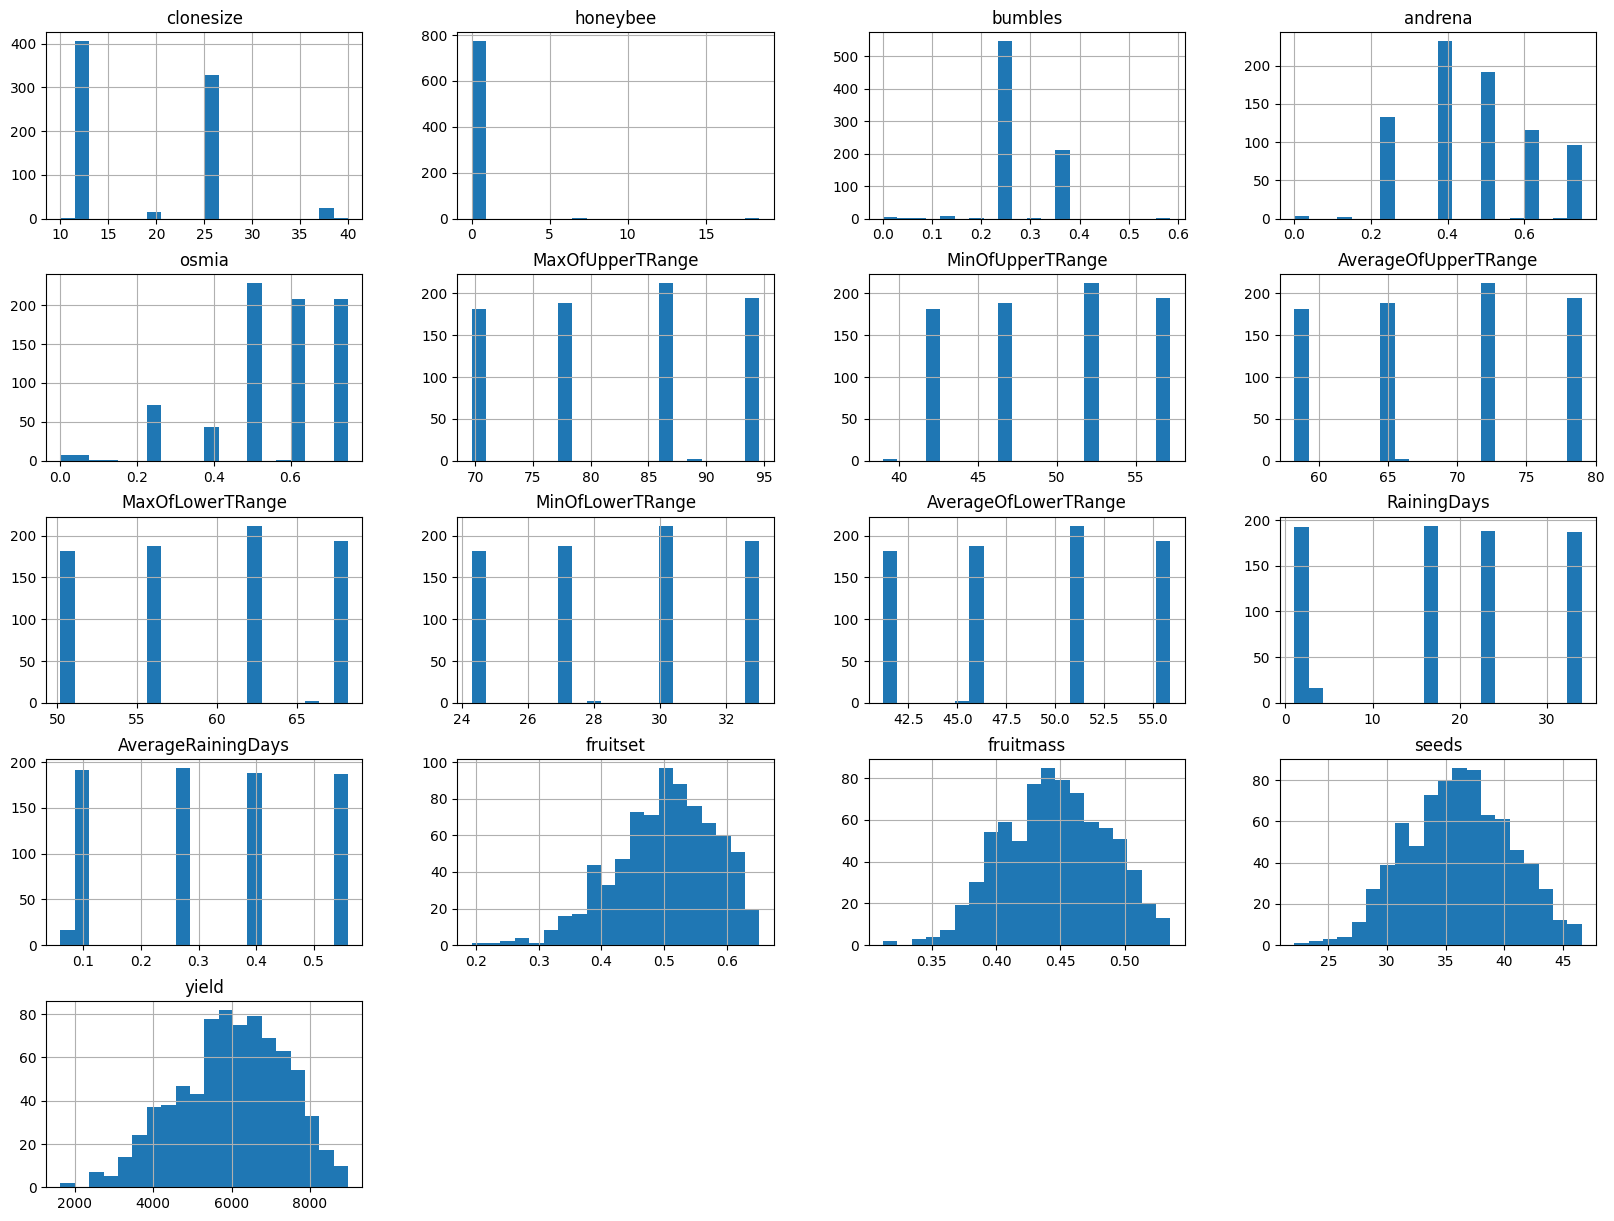

In [7]:
df_wps.hist(layout=(5,4), figsize=(20,15), bins=20)
plt.show()

Target looks like regression


Not plotting highly correlated (0.9774485367467639) feature seeds. Set prune_correlations_threshold=0 to keep.
Not plotting highly correlated (0.954948440306085) feature fruitmass. Set prune_correlations_threshold=0 to keep.
Not plotting highly correlated (0.991316888206444) feature AverageRainingDays. Set prune_correlations_threshold=0 to keep.
Not plotting highly correlated (1.0) feature MaxOfUpperTRange. Set prune_correlations_threshold=0 to keep.
Not plotting highly correlated (0.9987618284100174) feature MinOfLowerTRange. Set prune_correlations_threshold=0 to keep.
Not plotting highly correlated (0.9987618284100174) feature AverageOfUpperTRange. Set prune_correlations_threshold=0 to keep.
Not plotting highly correlated (0.9956114884573003) feature AverageOfLowerTRange. Set prune_correlations_threshold=0 to keep.
Not plotting highly correlated (0.9907556604771278) feature MinOfUpperTRange. Set prune_correlations_threshold=0 to keep.


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='yield', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=9.82E-01'}, xlabel='fruitset', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=-5.75E-01'}, xlabel='RainingDays (jittered)'>,
         <AxesSubplot:title={'center':'F=-4.98E-01'}, xlabel='clonesize (jittered)'>,
         <AxesSubplot:title={'center':'F=-3.41E-01'}, xlabel='honeybee (jittered)'>],
        [<AxesSubplot:title={'center':'F=3.15E-01'}, xlabel='osmia (jittered)', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=2.86E-01'}, xlabel='bumbles (jittered)'>,
         <AxesSubplot:title={'center':'F=-1.61E-01'}, xlabel='MaxOfLowerTRange (jittered)'>,
         <AxesSubplot:title={'center':'F=1.23E-01'}, xlabel='andrena (jittered)'>]],
       dtype=object),
 None]

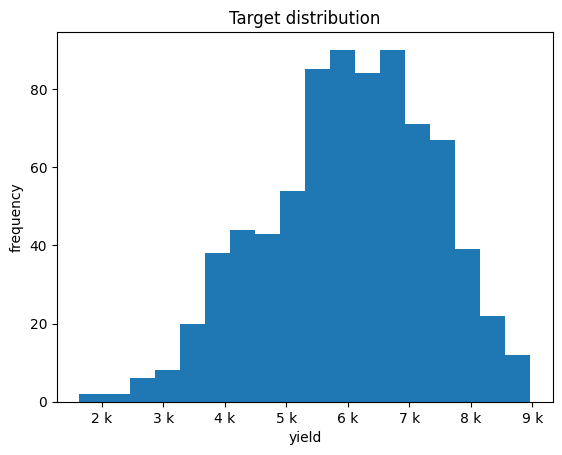

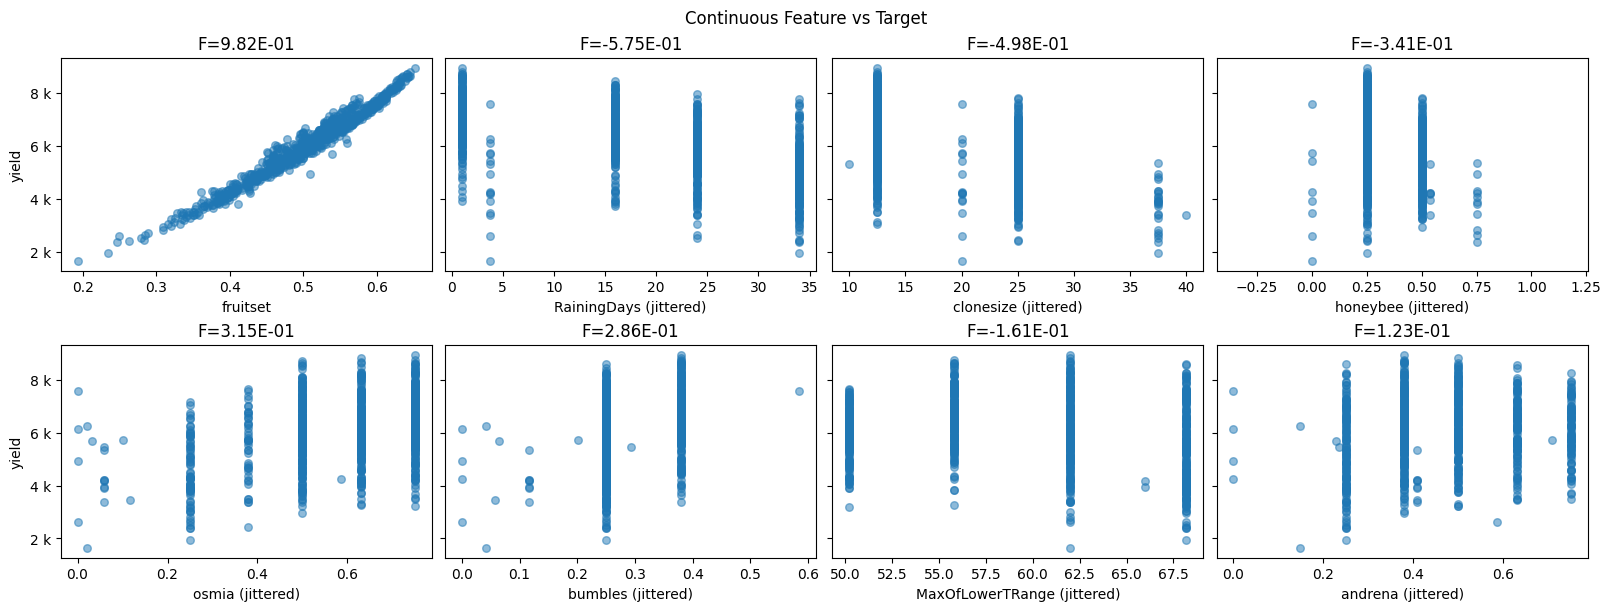

In [11]:
#EDA using dabl
dabl.plot(df_wps, target_col="yield")

In [8]:
df_wps.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [9]:
df_wps.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [10]:
df_wps.nunique()

clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

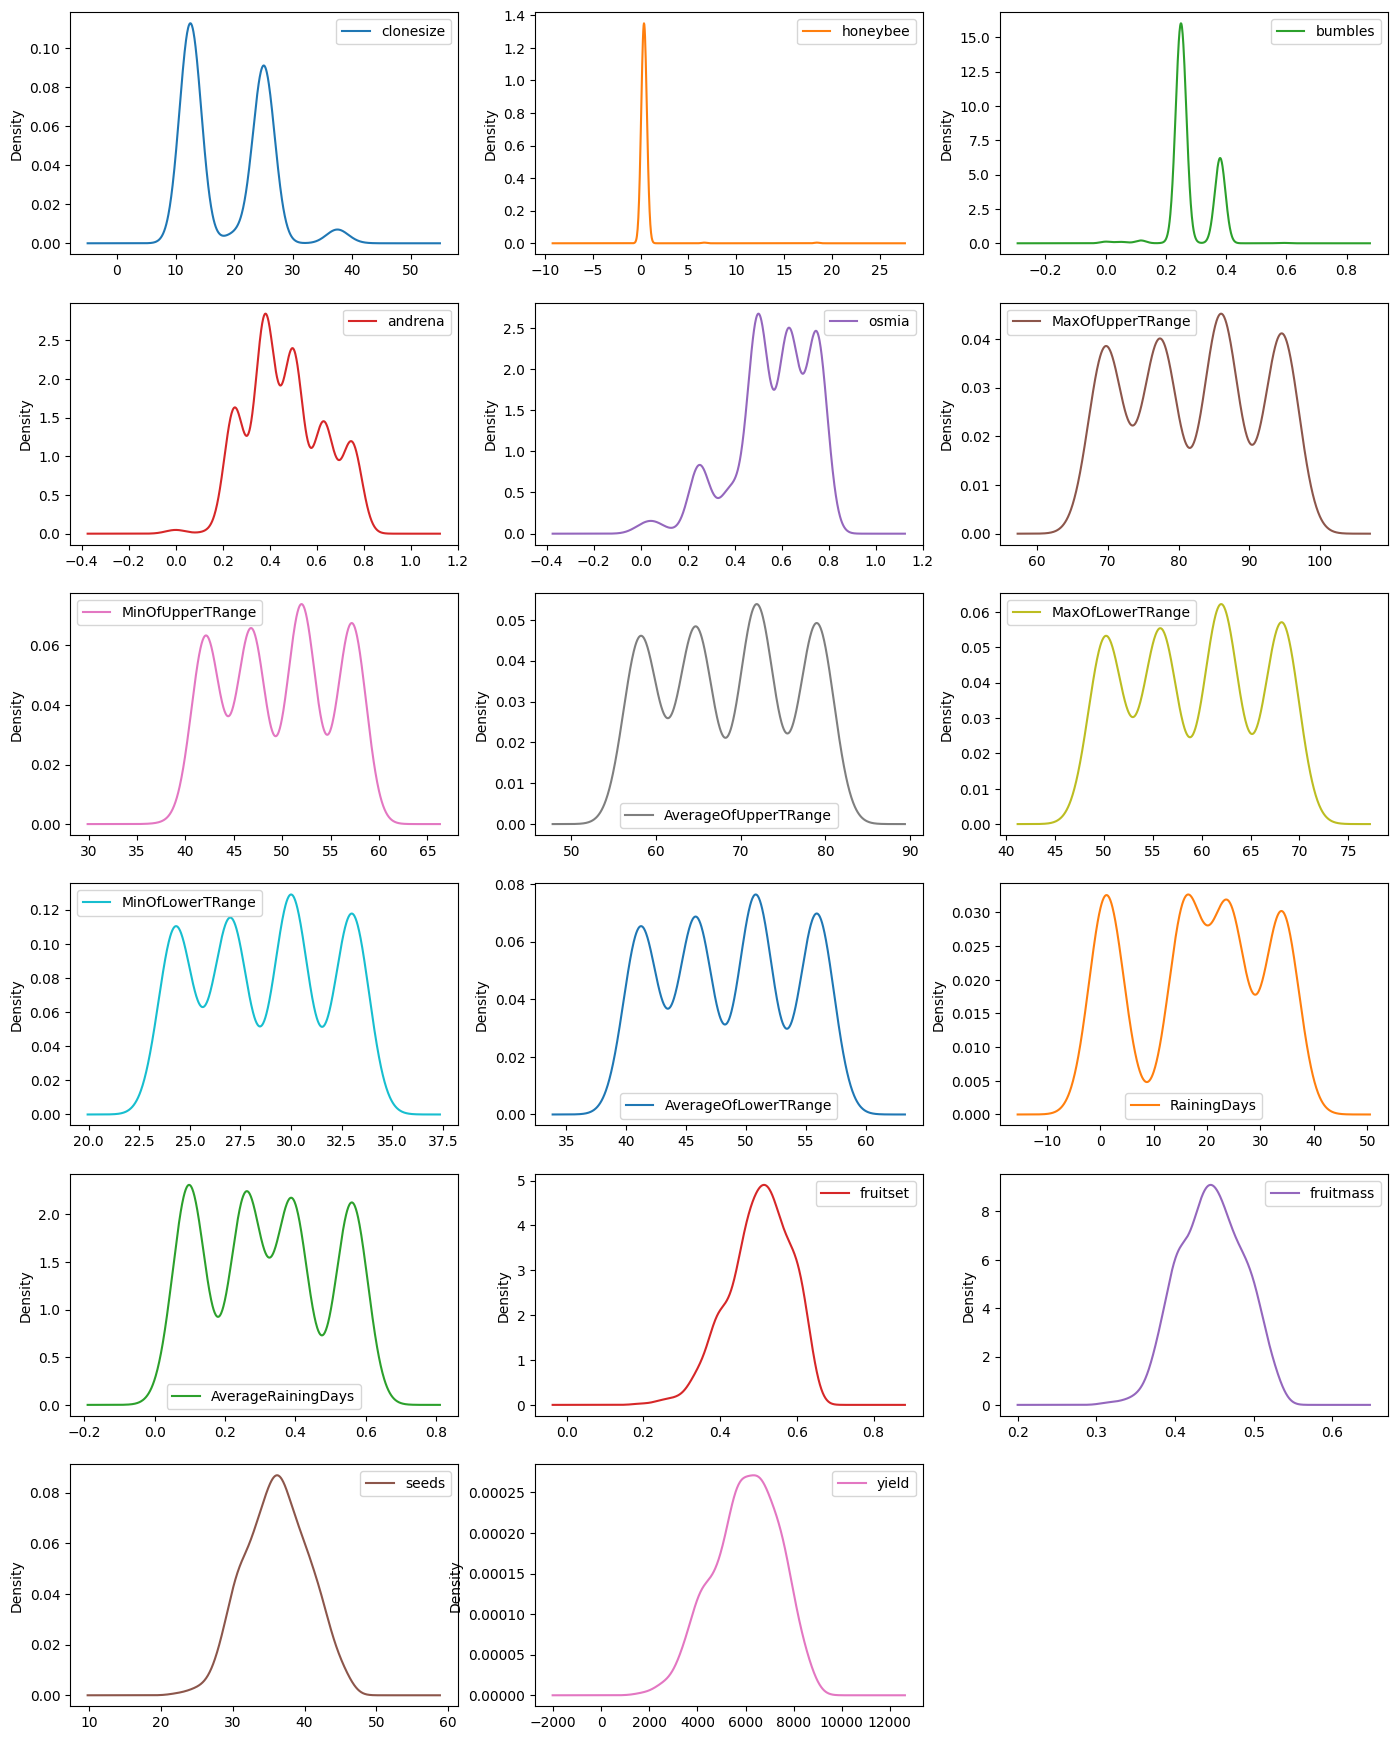

In [11]:
df_wps.plot(kind="density", 
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

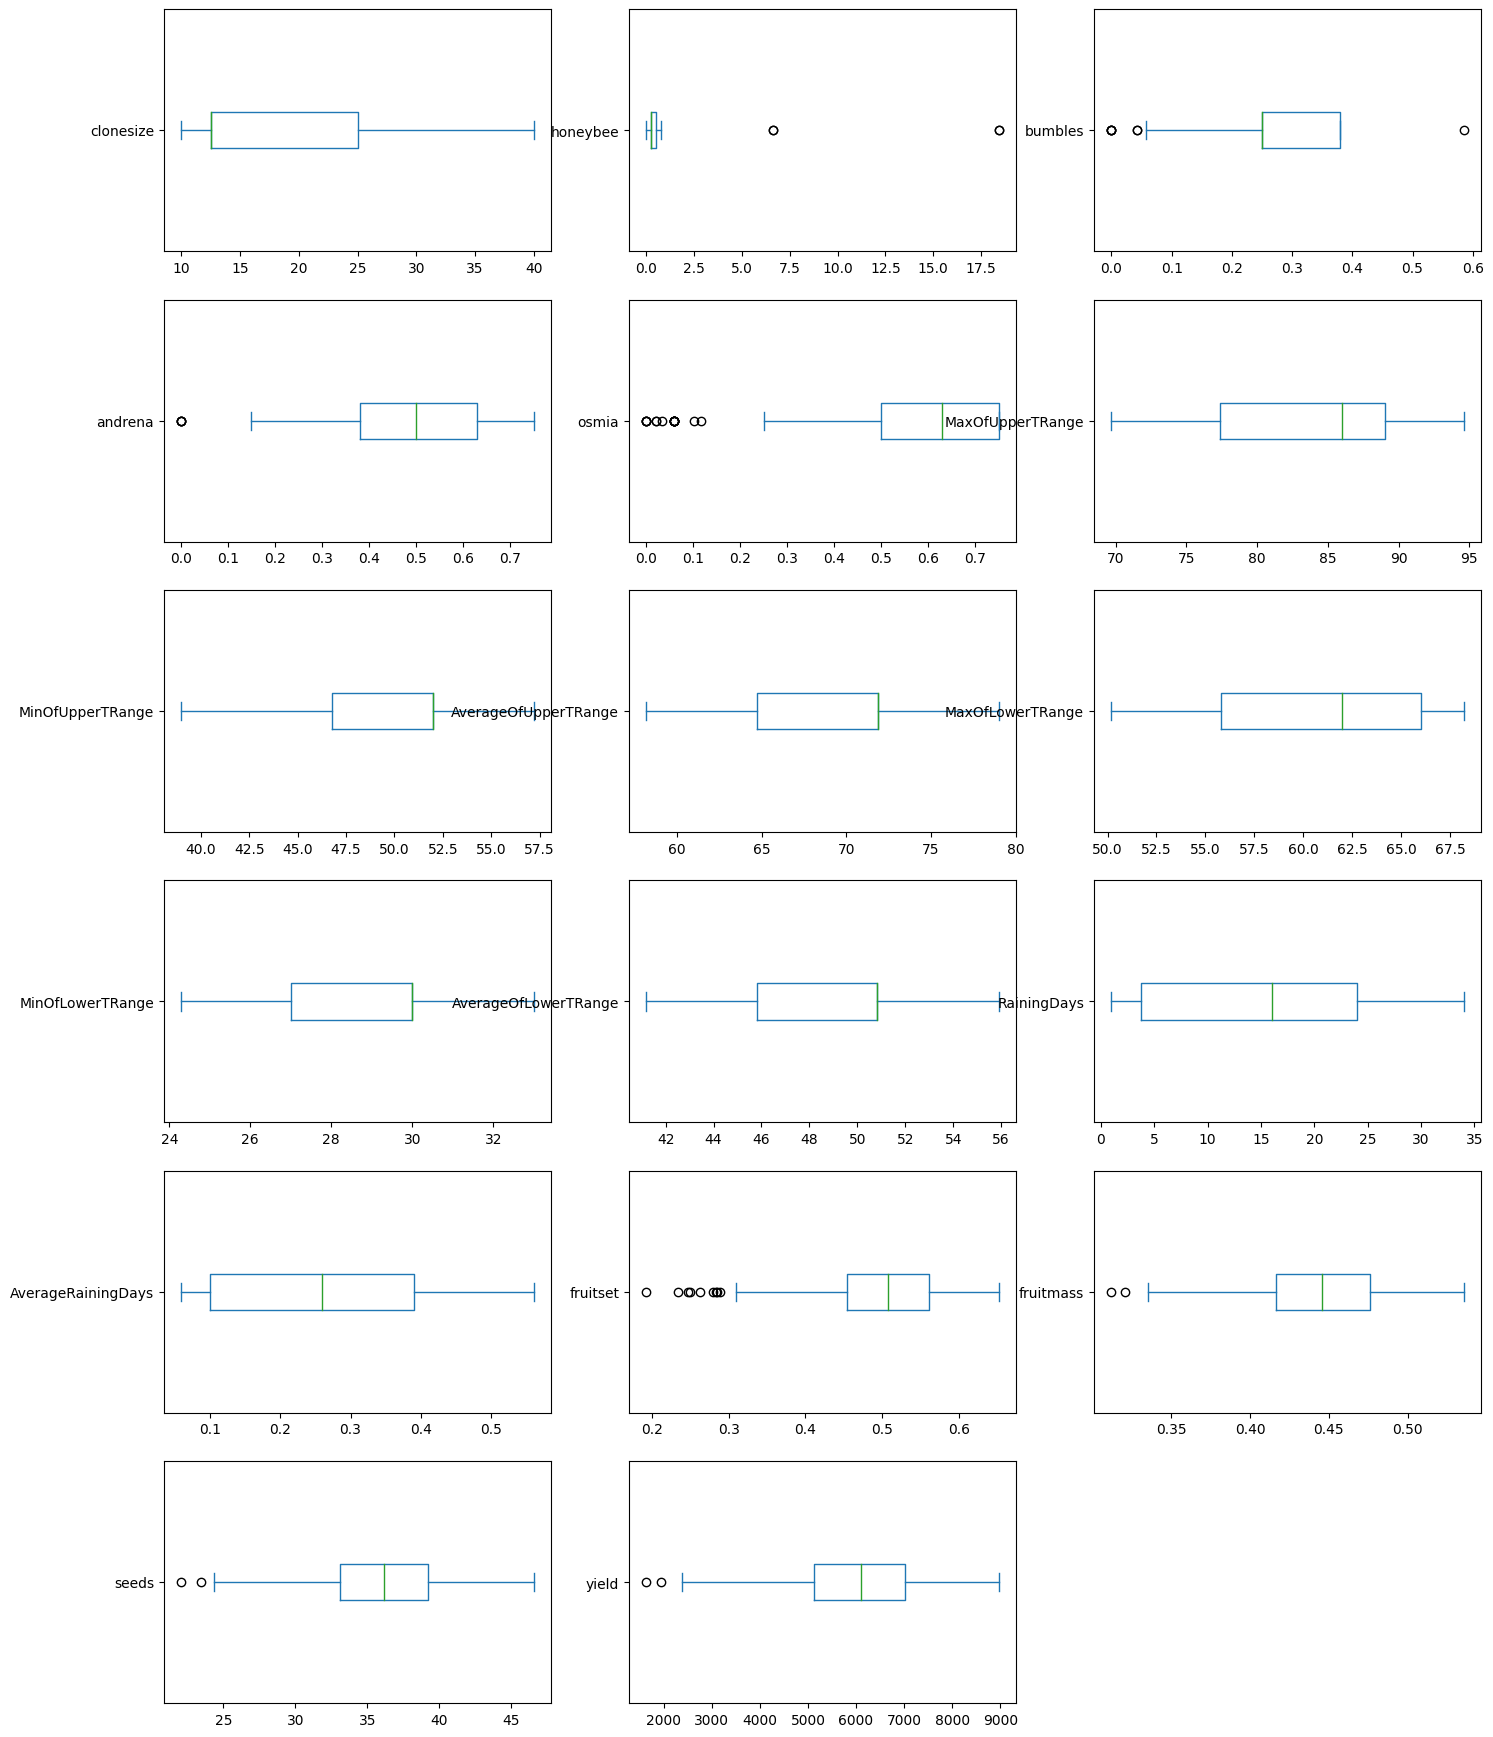

In [12]:
df_wps.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

<AxesSubplot:>

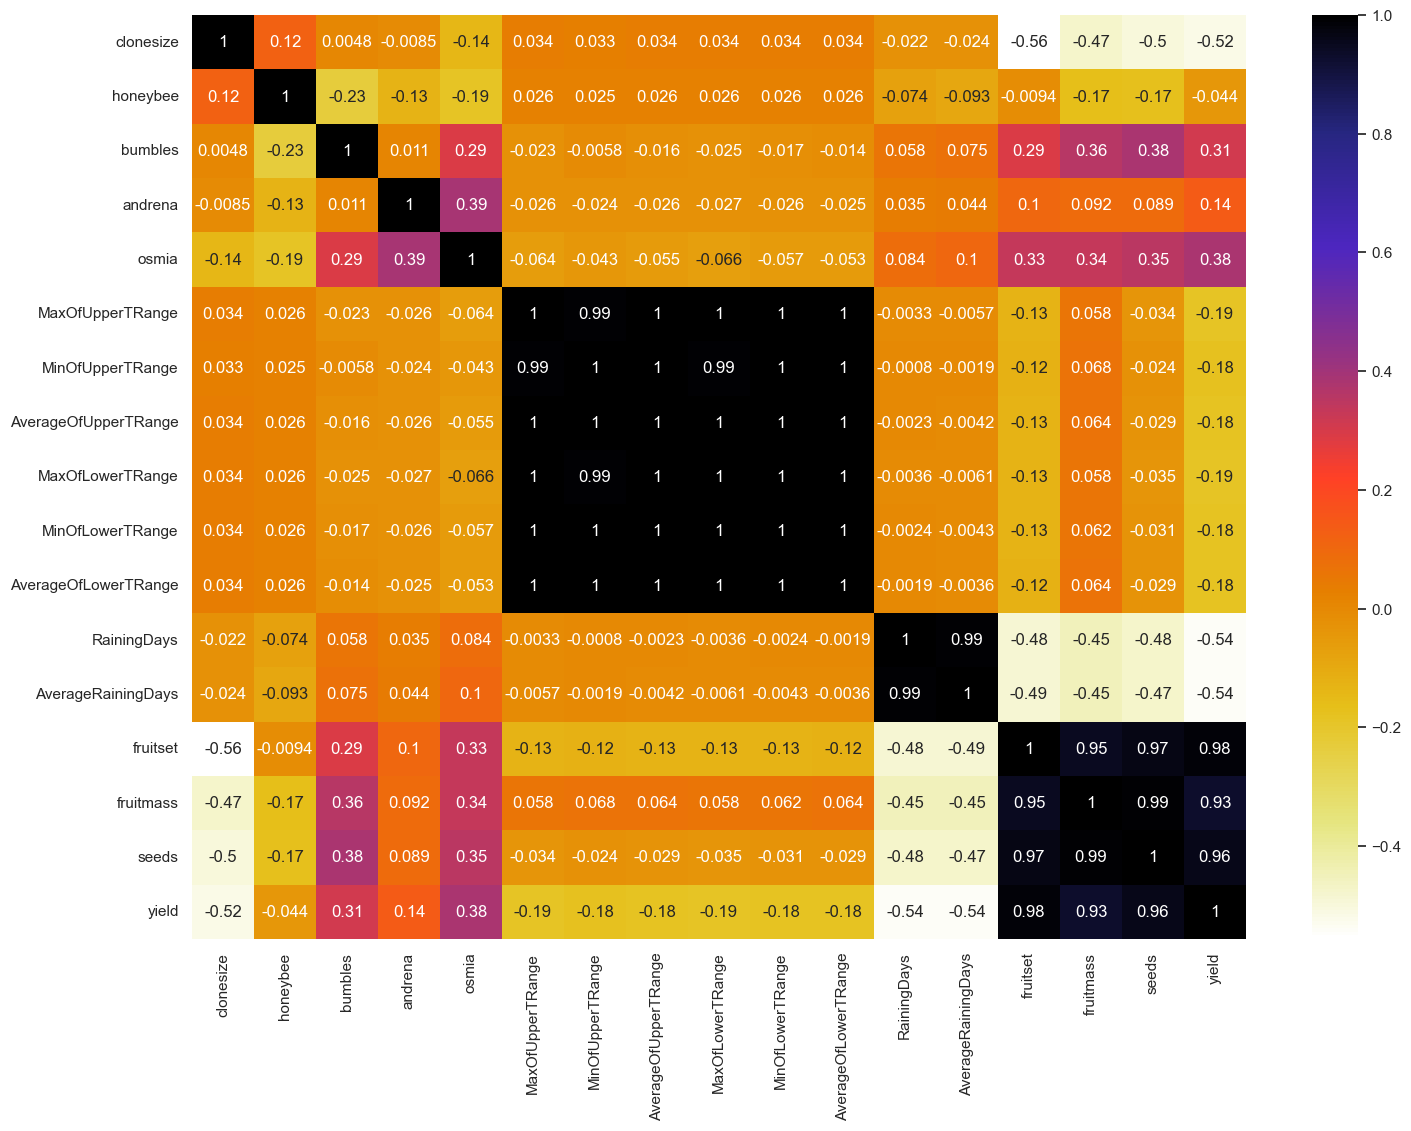

In [13]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(df_wps.corr(), annot=True, cmap=plt.cm.CMRmap_r)

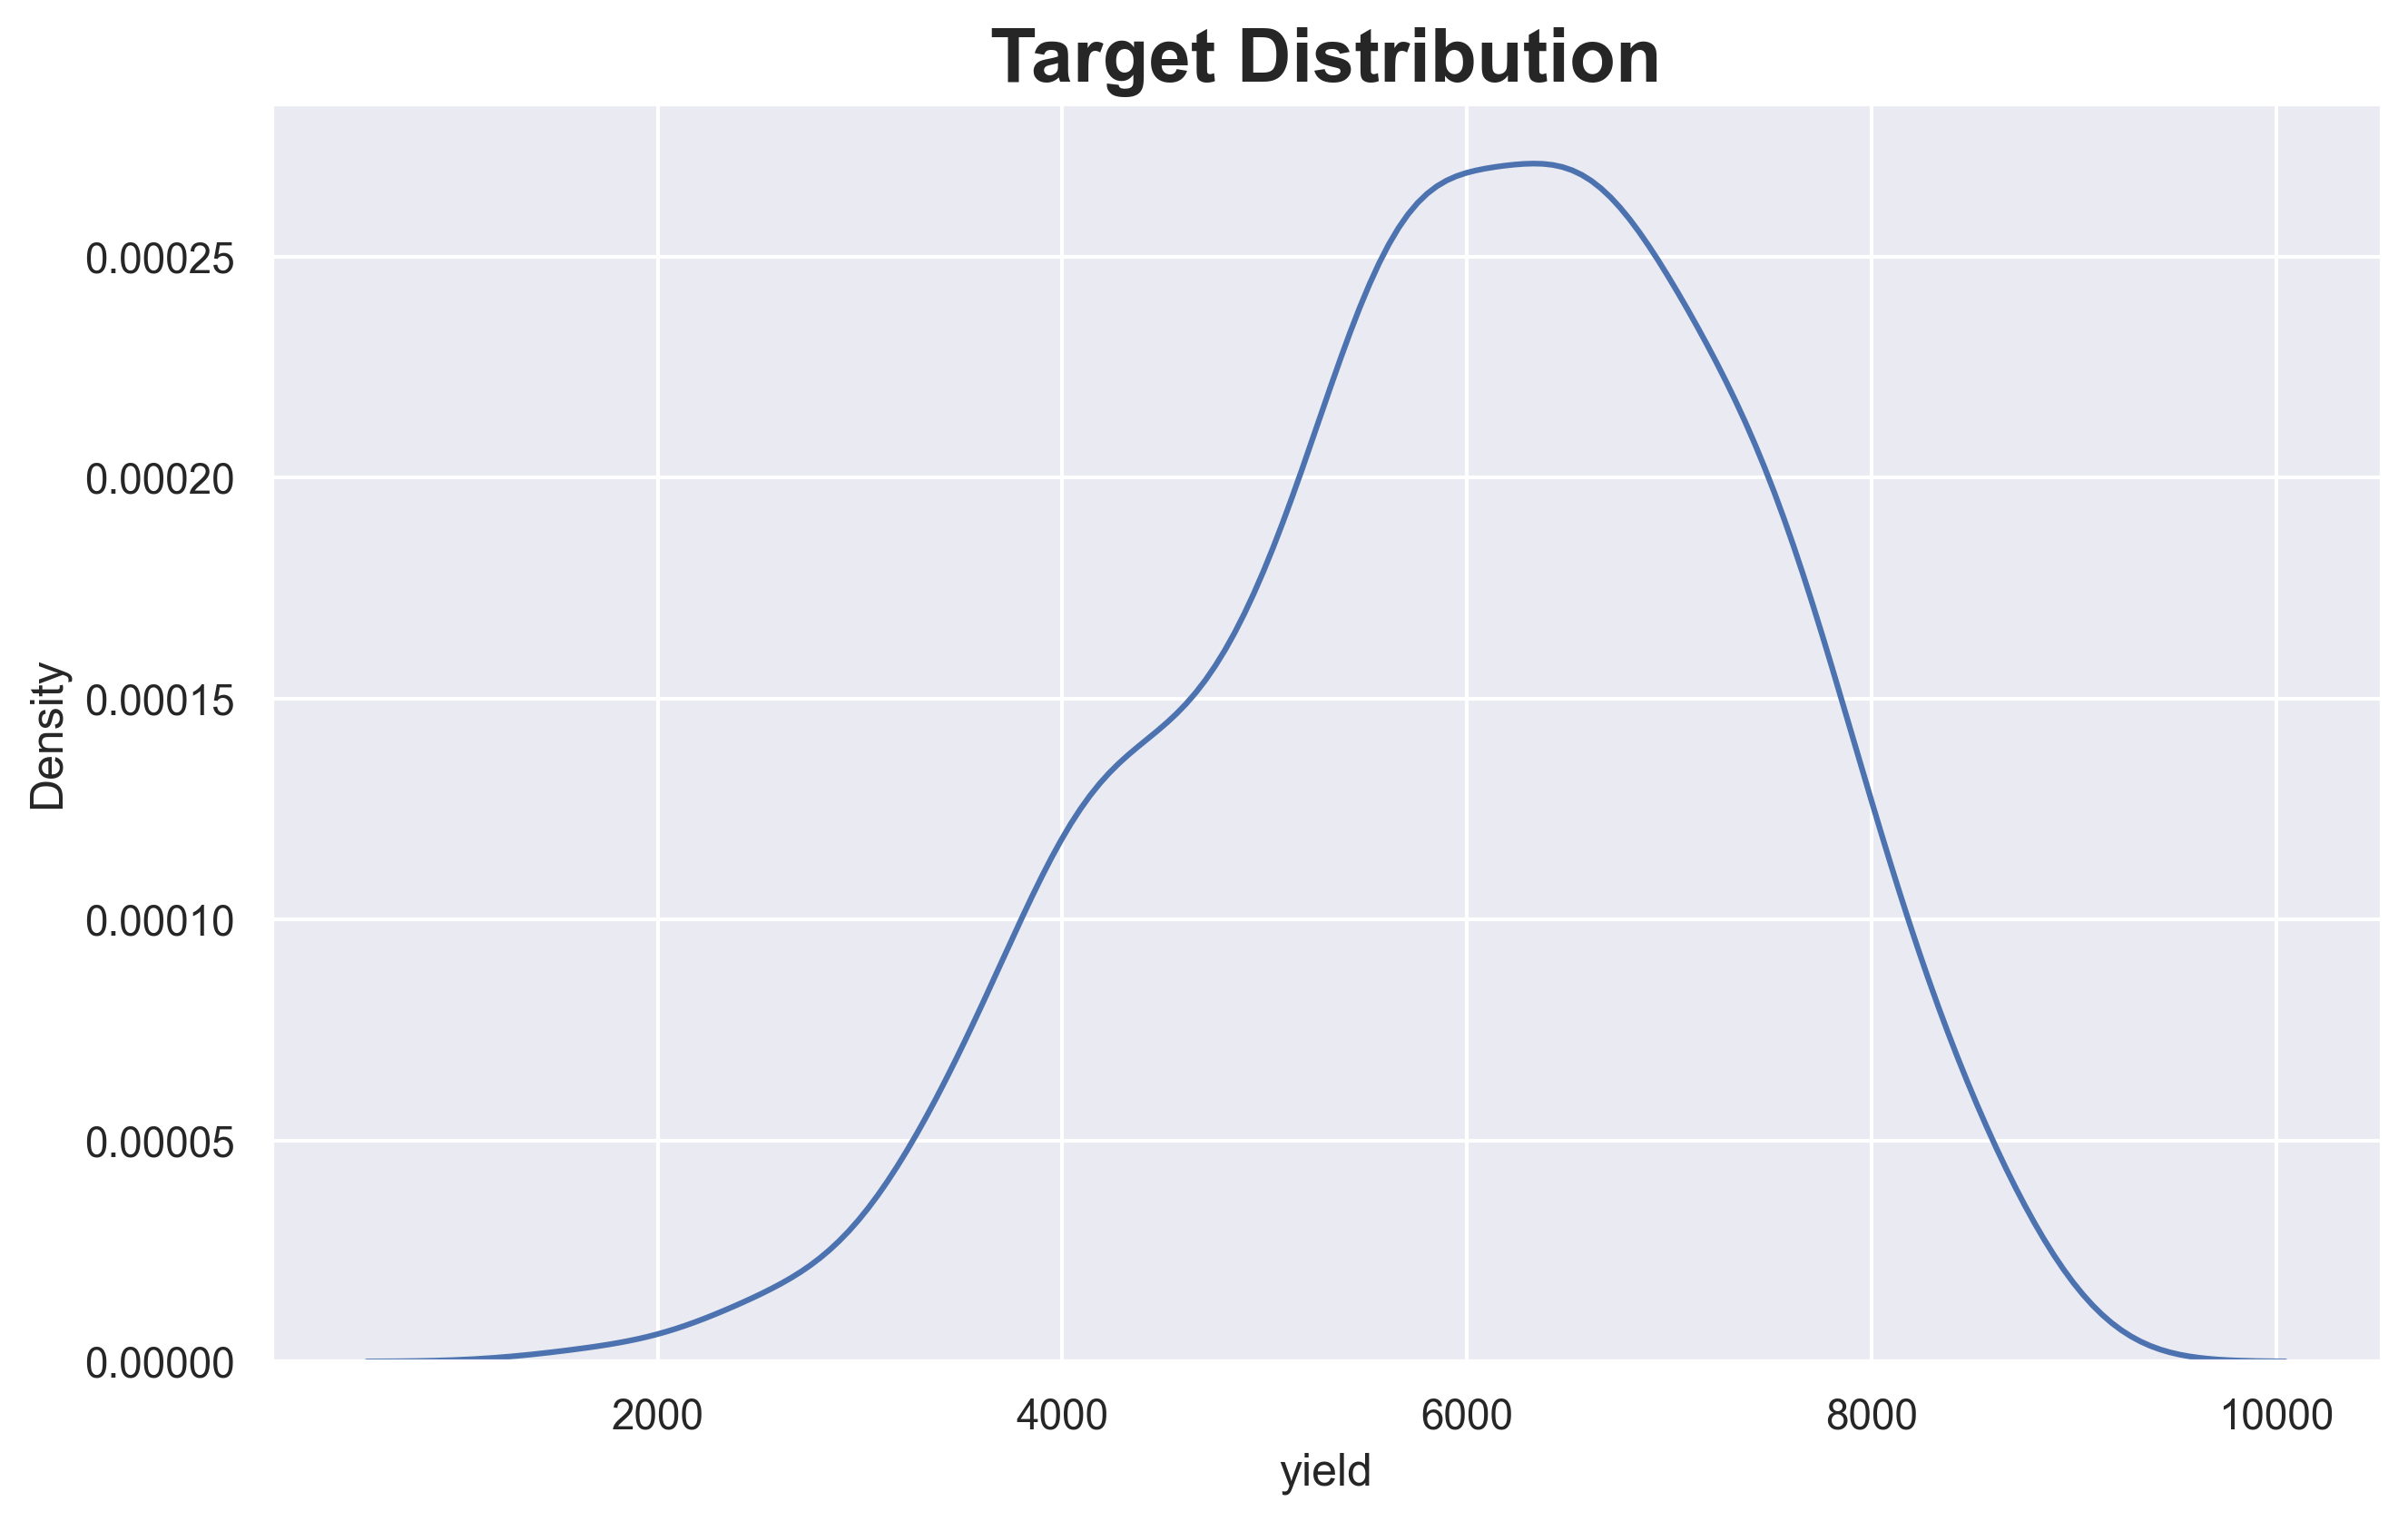

In [14]:
plt.figure(figsize = (10, 6), dpi = 300)
sns.kdeplot(data = df_wps, x = 'yield')
plt.title('Target Distribution', weight = 'bold', size = 20)
plt.show()

In [15]:
def heatmap(dataset, label = None):
    corr = dataset.corr(method = 'spearman')
    plt.figure(figsize = (14, 10), dpi = 300)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'viridis', annot = True, annot_kws = {'size' : 7})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
    plt.show()

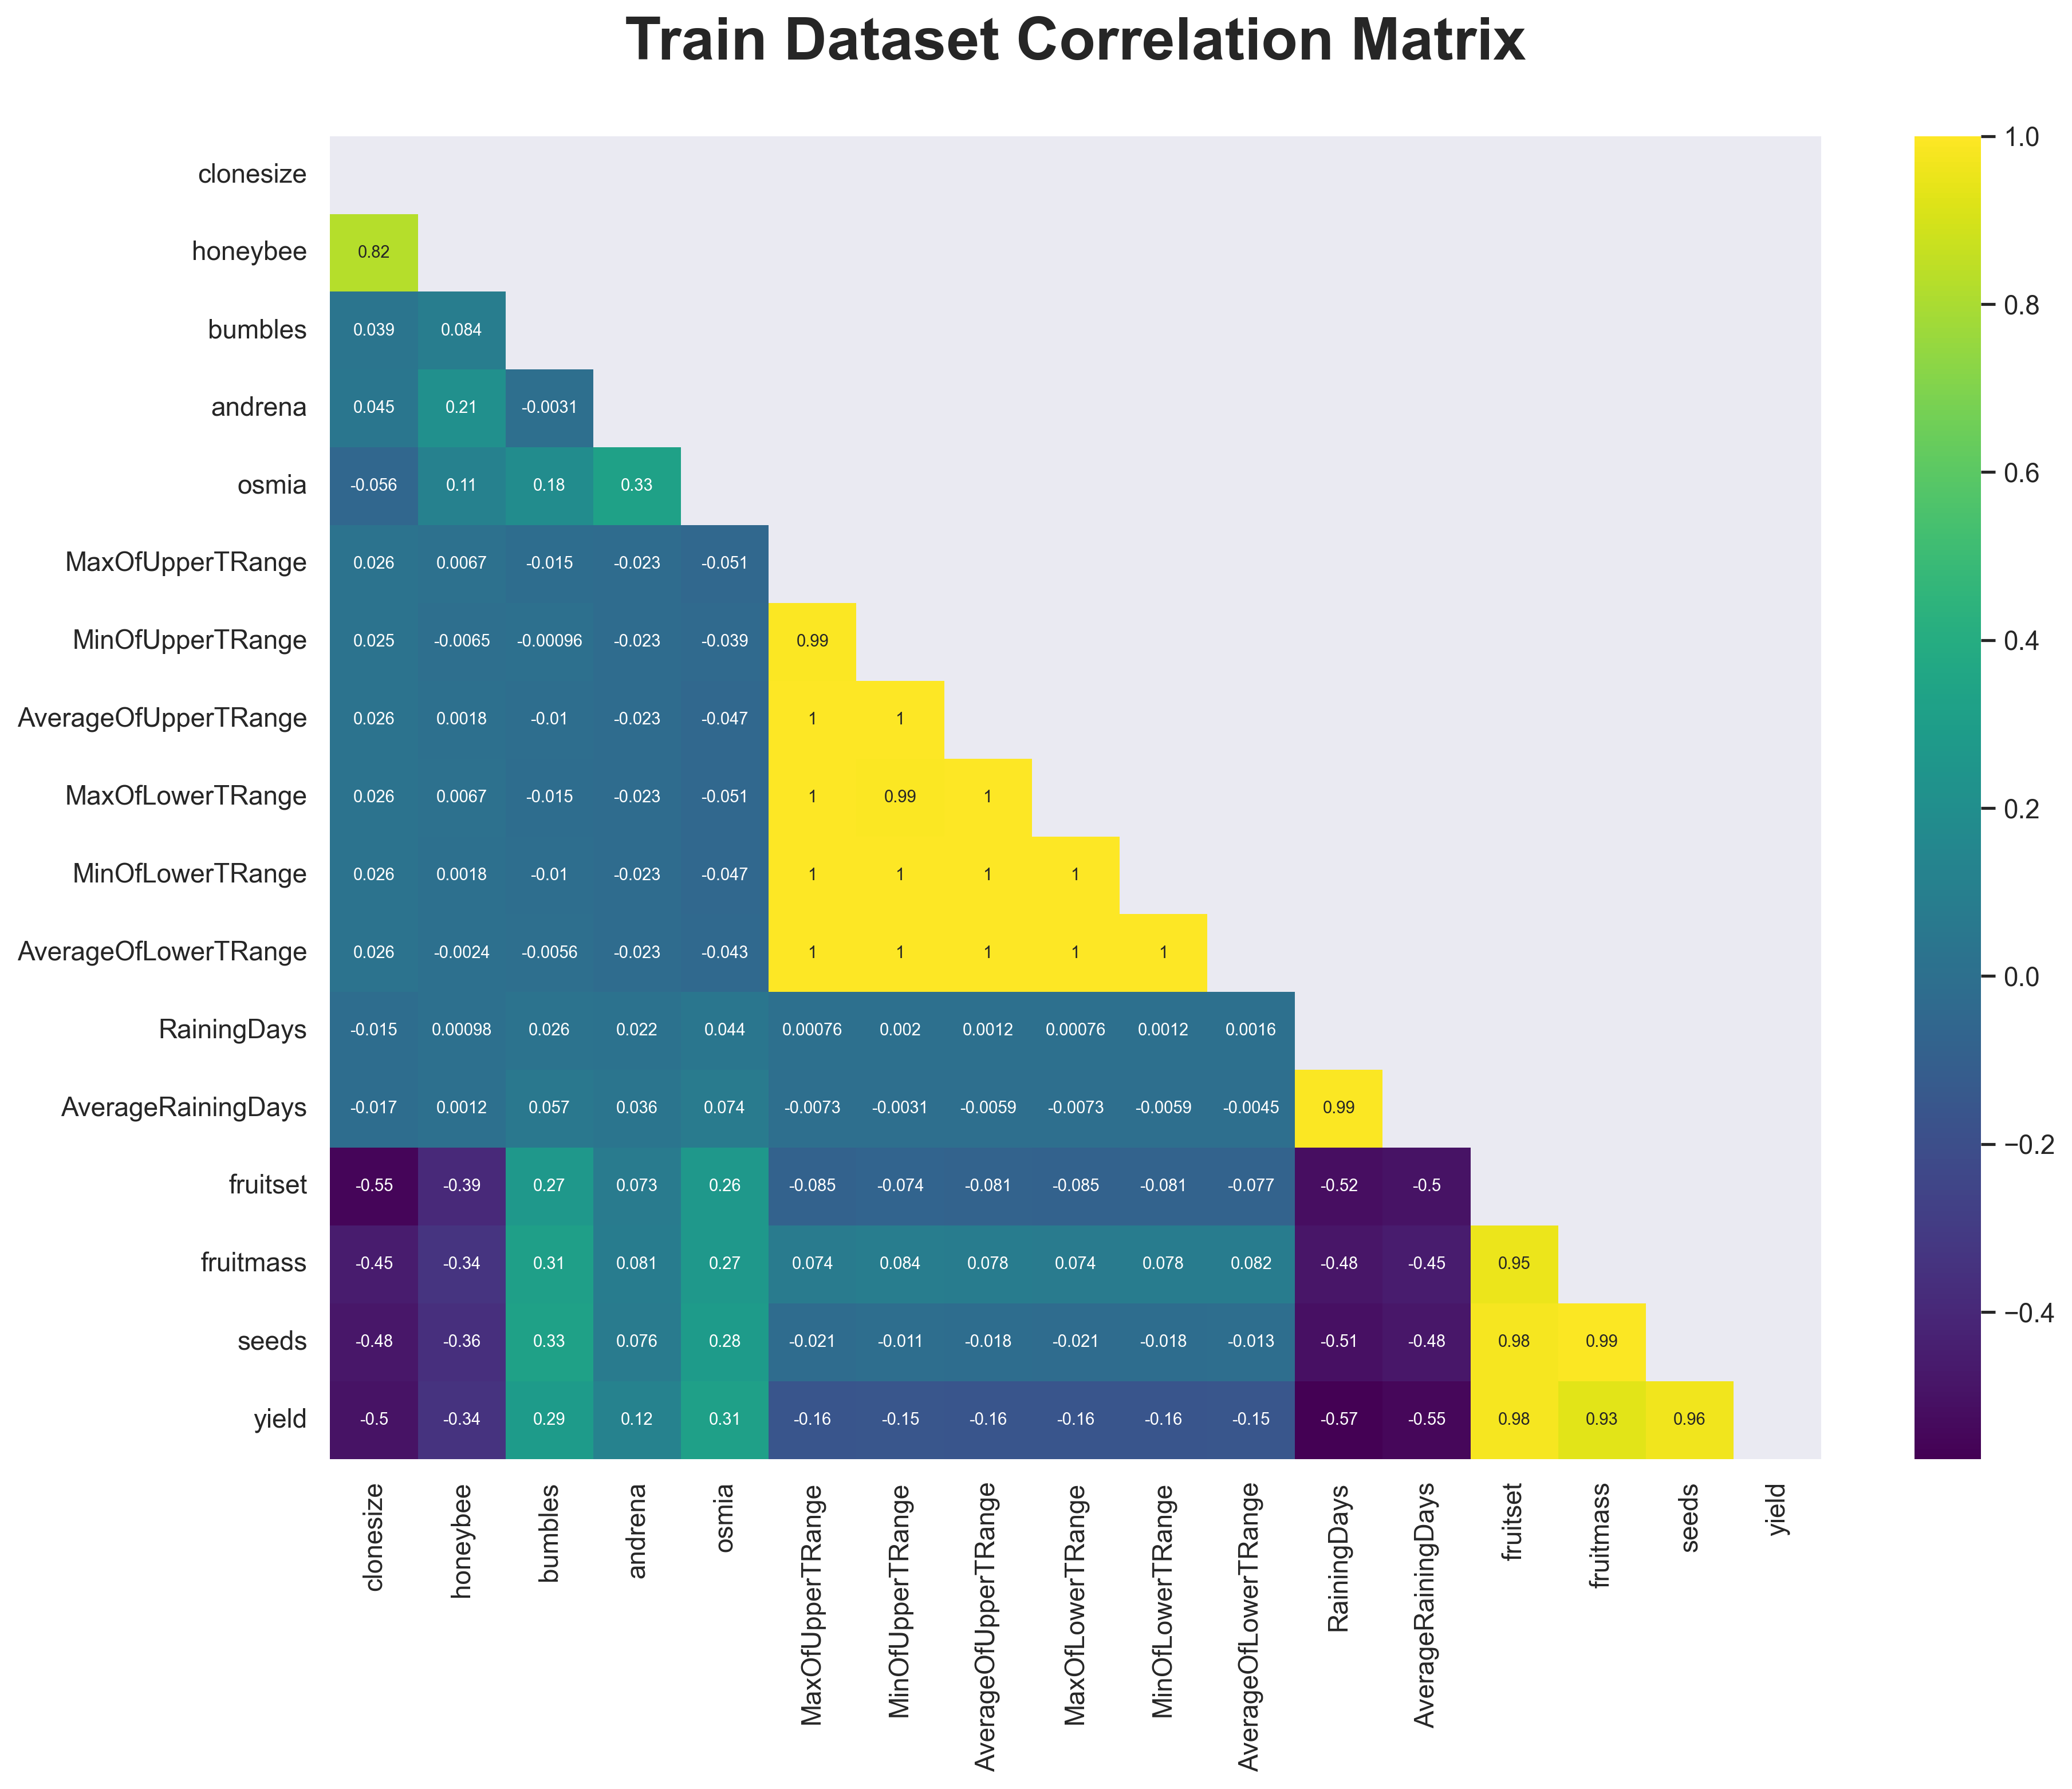

In [16]:
heatmap(df_wps, 'Train')

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
def distance(data, label = ''):
    #thanks to @sergiosaharovsky for the fix
    corr = data.corr(method = 'spearman')
    dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')
    
    plt.figure(figsize = (20, 8), dpi = 300)
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=90)
    plt.title(f'Feature Distance in {label} Dataset', weight = 'bold', size = 22)
    plt.show()

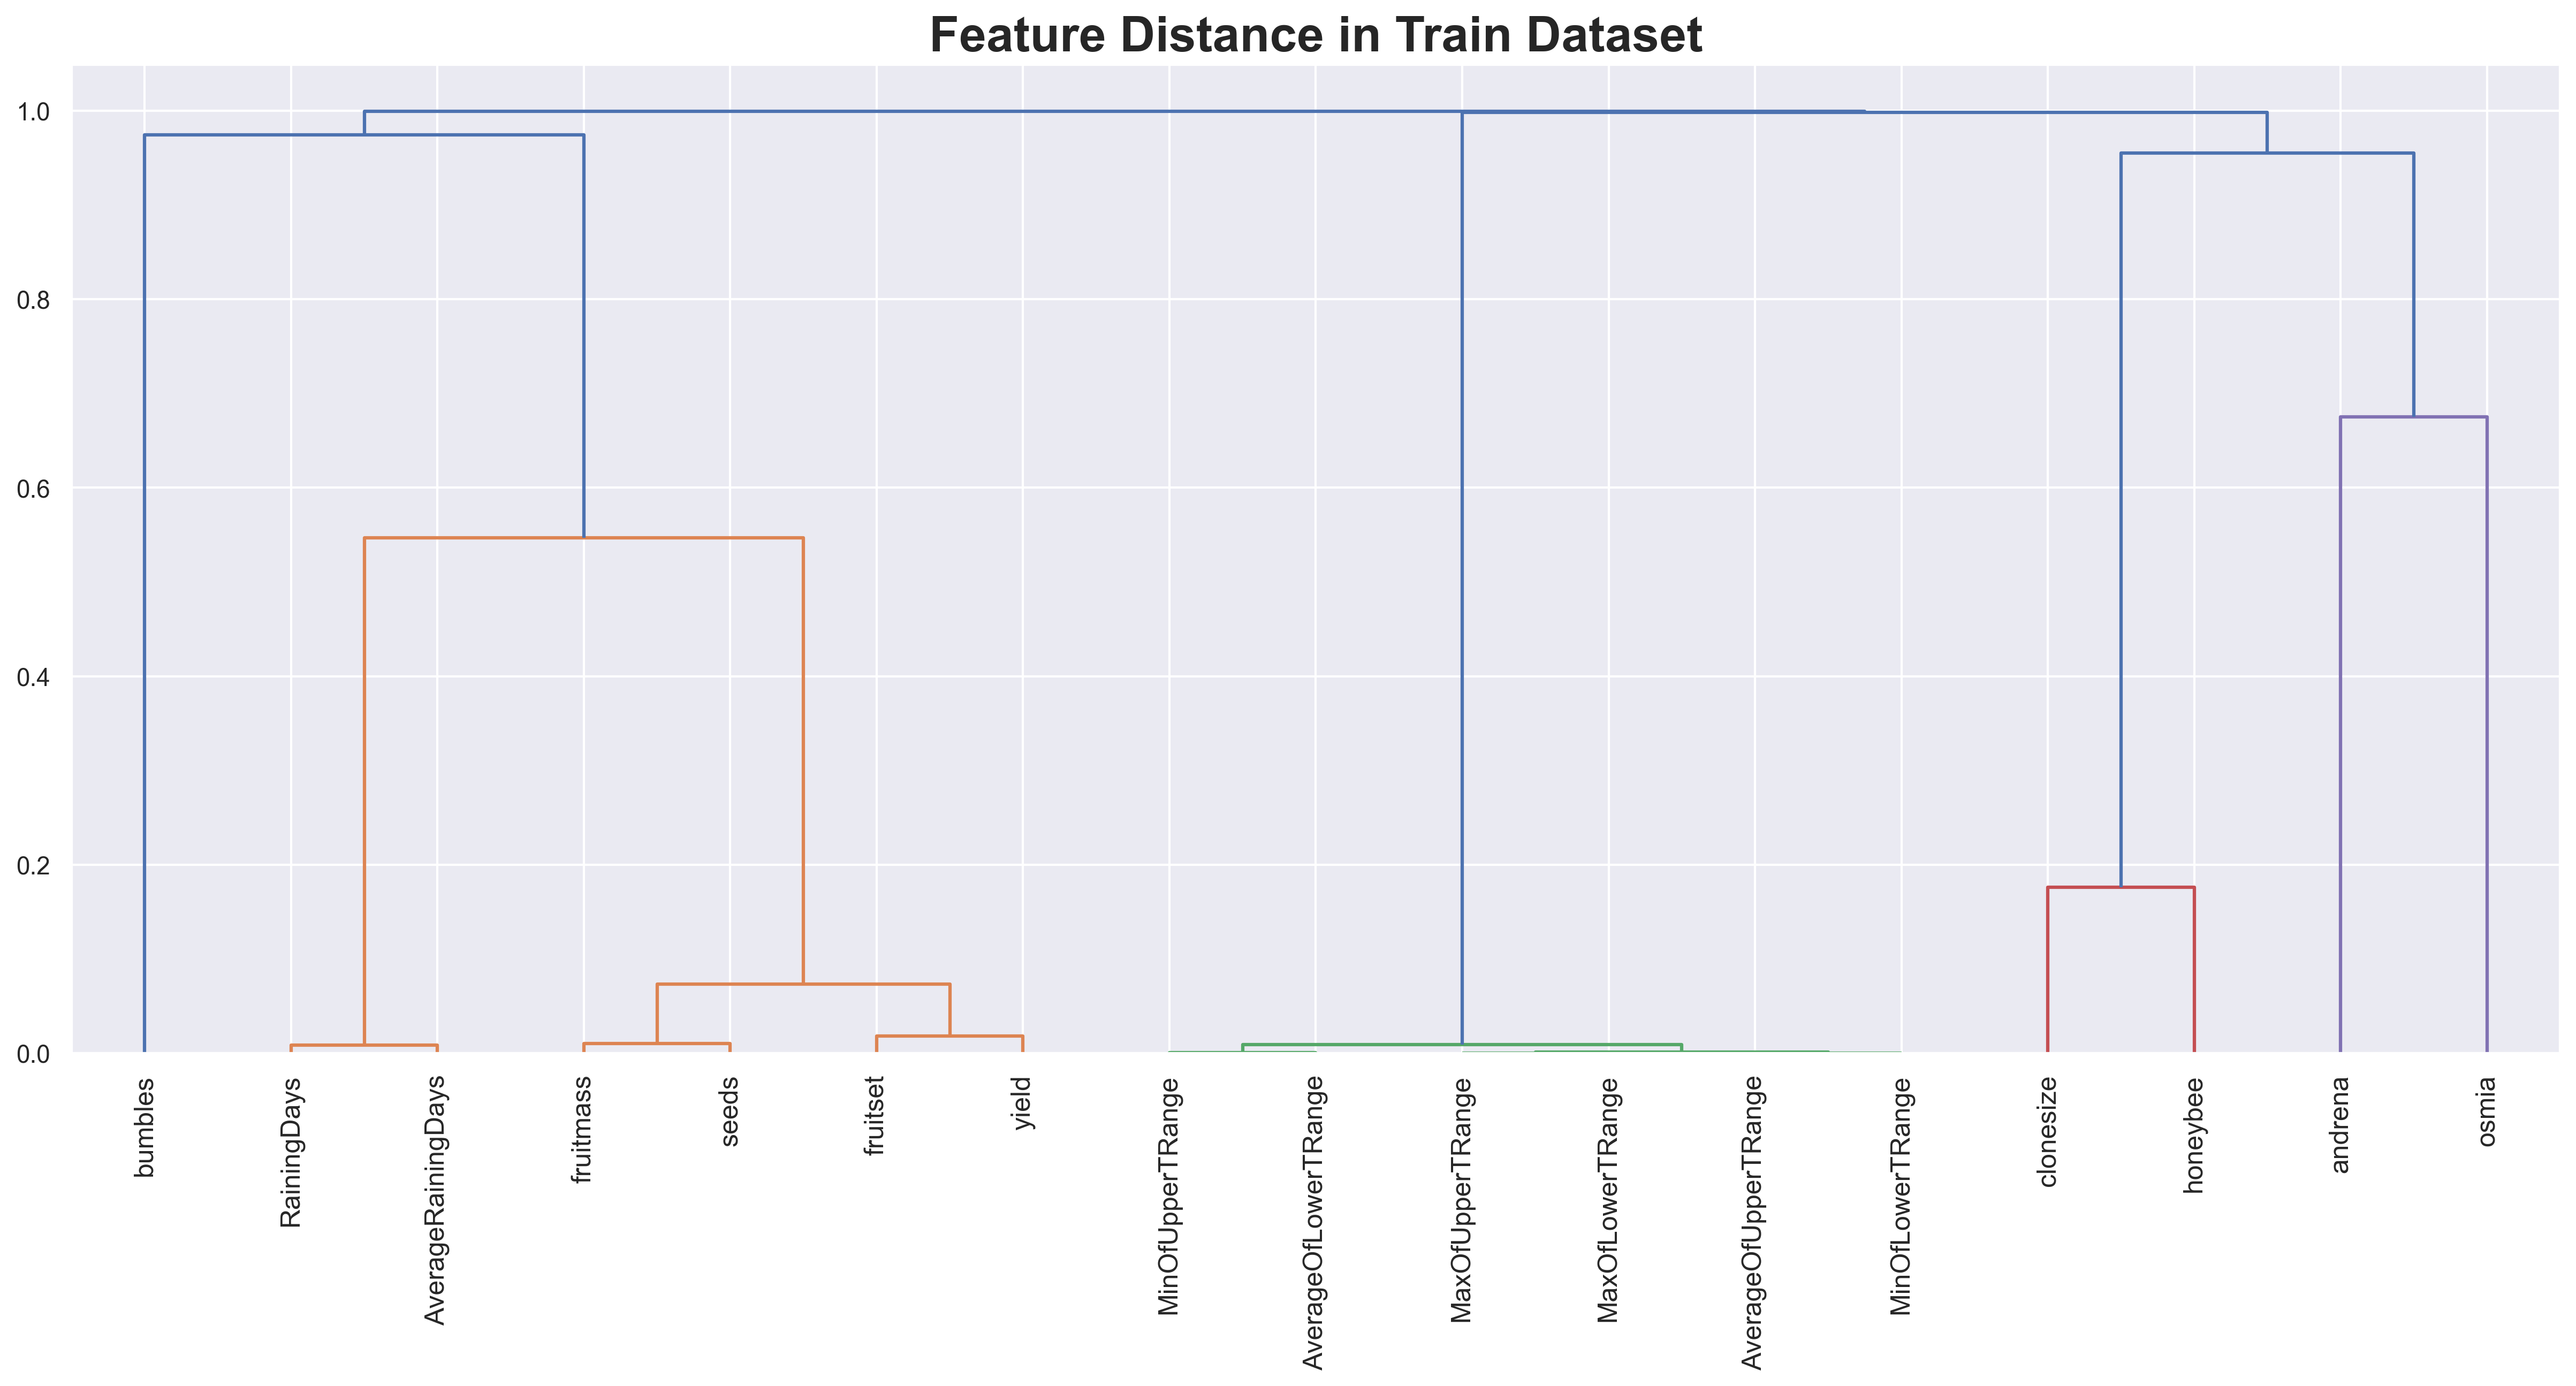

In [24]:
distance(df_wps, 'Train')

In [25]:
def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [26]:
X = df_wps.drop(["yield"], axis=1)
y = df_wps['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

Feature clonesize: 0.140818
Feature honeybee: 0.095269
Feature bumbles: 0.069936
Feature andrena: 0.049309
Feature osmia: 0.113531
Feature MaxOfUpperTRange: 0.089257
Feature MinOfUpperTRange: 0.086383
Feature AverageOfUpperTRange: 0.083154
Feature MaxOfLowerTRange: 0.093990
Feature MinOfLowerTRange: 0.082370
Feature AverageOfLowerTRange: 0.082131
Feature RainingDays: 0.193798
Feature AverageRainingDays: 0.191837
Feature fruitset: 1.950900
Feature fruitmass: 1.614620
Feature seeds: 1.636104


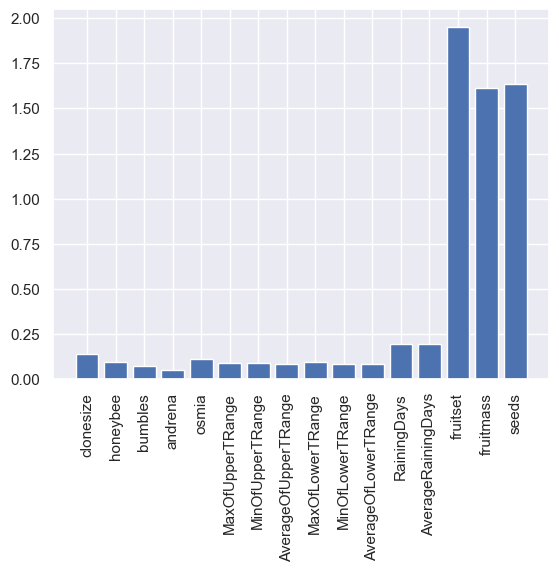

In [27]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()
    
#fs_score_plot(fs_corr)
fs_score_plot(fs_info)

In [30]:
df_wps_new = df_wps.drop(columns=['MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee', "fruitset", "fruitmass", "seeds"])
df_wps_new

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,3373.436842
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


In [32]:
df_wps_new = df_wps_new.drop(['AverageOfUpperTRange'],axis=1)

In [33]:
X = df_wps_new.drop(["yield"], axis=1)
y = df_wps_new['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [34]:
df_wps_new

,clonesize,bumbles,andrena,osmia,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,50.8,0.06,5333.873335
773,40.0,0.117,0.409,0.058,50.8,0.06,3373.436842
774,20.0,0.117,0.409,0.058,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,45.3,0.06,4166.299735


In [37]:
lreg = LinearRegression()

lreg.fit(X_train, y_train)

yhat = lreg.predict(X_test)

In [38]:
mae_linear = mean_absolute_error(y_test, yhat)
mse_linear = mean_squared_error(y_test, yhat)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 534.577
MSE: 411600.607
RMSE: 641.561
R-Square: 0.790


In [41]:
### <span style="font-family:cursive;text-align:center">RandomForest Regression</span>

rf = RandomForestRegressor()

rf.fit(X_train, y_train)
    
yhat = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, yhat)
mse_rf = mean_squared_error(y_test, yhat)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, yhat)
print('For Random Forest')
print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
### <span style="font-family:cursive;text-align:center">Decision Tree Regression</span>

dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)

yhat = dtree.predict(X_test)

mae_dt = mean_absolute_error(y_test, yhat)
mse_dt = mean_squared_error(y_test, yhat)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, yhat)
print('For DecisionTree')
print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
### <span style="font-family:cursive;text-align:center">XGBRegression</span>

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

yhat = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, yhat)
mse_xgb = mean_squared_error(y_test, yhat)
rmse_xgb = np.sqrt(mse_dt)
rsq_xgb = r2_score(y_test, yhat)
print('For XGB')
print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

For Random Forest
MAE: 247.769
MSE: 219173.040
RMSE: 468.159
R-Square: 0.888
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For DecisionTree
MAE: 308.261
MSE: 352807.609
RMSE: 593.976
R-Square: 0.820
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For XGB
MAE: 243.107
MSE: 301036.577
RMSE: 593.976
R-Square: 0.846
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


cv = RepeatedKFold(n_splits= 78,n_repeats = 3,random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])


In [50]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train.shape[1]-6, X_train.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train.shape[1]-6, X_train.shape[1]-4)],
        'model__criterion': ['squared_error', 'absolute_error'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train.shape[1]-6, X_train.shape[1]-4)],
                    'model__criterion': ['squared_error', 'absolute_error'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train.shape[1]-6, X_train.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [55]:
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train, y_train.values.ravel())
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    ## Save best grid search pipeline to file
    # dump_file = 'best_grid_search_pipeline.pkl'
    # joblib.dump(best_gs, dump_file, compress=1)
    # print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_regr], dump_file))
    
    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))
    
    return (grid_dict[best_regr], best_gs, least_mae)

In [56]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Logistic Regression


No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No feature

No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No feature

No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No feature

Best Config: {'sel__k': 1}
Best MAE: -877.563
Test set mean absolute error for best params: 941.047 
Test set root mean squared error for best params: 30.676 

Estimator: Random Forest



468 fits failed out of a total of 936.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
312 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\ensemble\_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\base.p

Best Config: {'model__criterion': 'squared_error', 'sel__k': 1}
Best MAE: -854.963
Test set mean absolute error for best params: 891.235 
Test set root mean squared error for best params: 29.854 

Estimator: XGBoost



468 fits failed out of a total of 936.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\xgboost\sklearn.py", line 972, in fit
    callbacks=callbacks,

Best Config: {'model__subsample': 0.9, 'sel__k': 1}
Best MAE: -854.766
Test set mean absolute error for best params: 890.568 
Test set root mean squared error for best params: 29.842 

Estimator: Decision Tree
Best Config: {'model__criterion': 'absolute_error', 'sel__k': 1}
Best MAE: -854.554
Test set mean absolute error for best params: 894.696 
Test set root mean squared error for best params: 29.911 

Classifier with least test set MAE: XGBoost
Best Model: XGBoost
Error Rate: 890.5676933206468
GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=78, random_state=1),
             estimator=Pipeline(steps=[('sel',
                                        SelectKBest(score_func=<function mutual_info_regression at 0x000002042AC54438>)),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
 


468 fits failed out of a total of 936.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
312 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\tree\_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\tree\_classes.py", line 166, in fit
   

In [47]:
RF.fit(X_train, y_train)
print('Best Config: %s' % RF.best_params_)
print('Best MAE: %.3f' % RF.best_score_)
y_pred_v1_rf1 = RF.predict(X_test)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))


1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\ensemble\_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "C:\Users\shrie\Anaconda3\envs\mgp\lib\site-packages\sklearn\base

Best Config: {'model__max_depth': 15, 'model__min_samples_split': 15, 'sel__k': 1}
Best MAE: -854.311
Test set mean absolute error for best params: 891.235 
Test set root mean squared error for best params: 29.854 


In [57]:
RF.best_estimator_.predict(X_test)

array([6962.46372589, 6545.44734232, 4931.34525029, 4931.34525029,
       6962.46372589, 6545.44734232, 5730.75933866, 6962.46372589,
       6962.46372589, 5730.75933866, 6962.46372589, 6545.44734232,
       4931.34525029, 6545.44734232, 5730.75933866, 4931.34525029,
       6545.44734232, 5730.75933866, 5730.75933866, 5730.75933866,
       5730.75933866, 4931.34525029, 6545.44734232, 4931.34525029,
       5730.75933866, 6962.46372589, 5730.75933866, 4327.44368391,
       6545.44734232, 4931.34525029, 6545.44734232, 4931.34525029,
       5730.75933866, 6545.44734232, 6962.46372589, 5730.75933866,
       6545.44734232, 6545.44734232, 4931.34525029, 6962.46372589,
       6545.44734232, 6545.44734232, 4931.34525029, 6545.44734232,
       6962.46372589, 4931.34525029, 6545.44734232, 5730.75933866,
       5730.75933866, 5730.75933866, 4931.34525029, 6962.46372589,
       6545.44734232, 6962.46372589, 4931.34525029, 4931.34525029,
       4931.34525029, 4931.34525029, 5730.75933866, 6545.44734

In [60]:
import pickle
filename = 'blueberry_model.pkl'
pickle.dump(RF.best_estimator_, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.36802827608889976


In [63]:
X_train.head(5)

,clonesize,bumbles,andrena,osmia,AverageOfLowerTRange,AverageRainingDays
286,12.5,0.25,0.63,0.63,41.2,0.10
614,25.0,0.25,0.75,0.50,45.8,0.56
528,25.0,0.25,0.50,0.63,55.9,0.56
708,25.0,0.38,0.50,0.50,41.2,0.10
116,12.5,0.25,0.25,0.75,50.8,0.10
